### Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Lendo os dados de treino: ----

In [3]:
def load(f):
    return np.load(f)['arr_0']

x_train = load('k49-train-imgs.npz')
y_train = load('k49-train-labels.npz')

# Flatten images
x_train = x_train.reshape(-1, 784)

scaler = preprocessing.StandardScaler().fit(x_train)


### Quantas observações por classe:

In [4]:
observacoes_por_classe = pd.Series(y_train).astype(int).value_counts()

In [5]:
observacoes_por_classe.sort_values(ascending=True)  ##classe com o menor número de observações

45     392
44     417
3      777
36    1598
32    1718
29    1993
22    2063
42    2139
43    2397
23    2451
16    2565
31    3060
33    3394
48    3523
14    3867
13    4165
8     4714
26    5132
12    6000
15    6000
10    6000
17    6000
9     6000
7     6000
0     6000
4     6000
19    6000
21    6000
1     6000
25    6000
27    6000
28    6000
30    6000
34    6000
35    6000
37    6000
38    6000
39    6000
40    6000
41    6000
46    6000
47    6000
20    6000
24    6000
18    6000
11    6000
2     6000
5     6000
6     6000
dtype: int64

<AxesSubplot:>

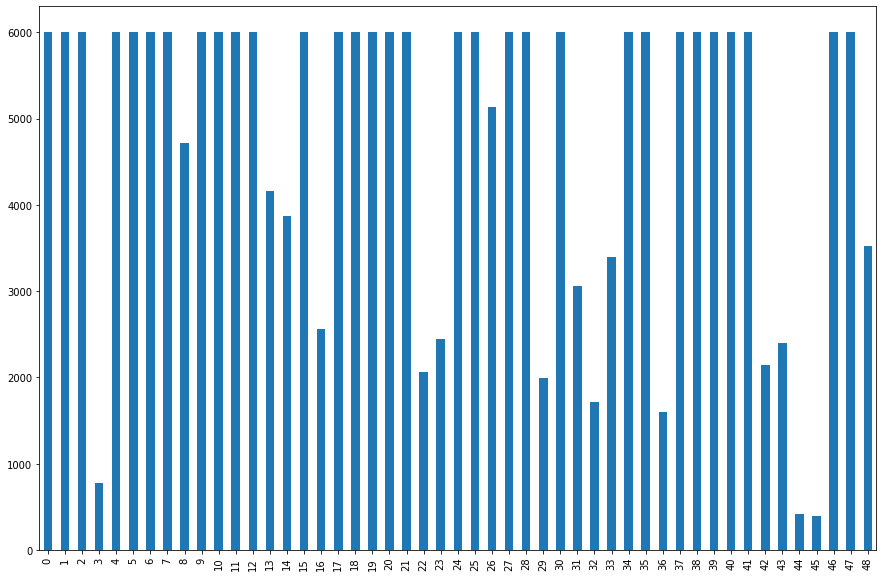

In [6]:
observacoes_por_classe.sort_index().plot.bar(figsize=(15, 10))

### Regressão Logística Multinomial

In [5]:
logreg=LogisticRegression(penalty='none', max_iter=500)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,x_train,y_train,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

C:\Users\karin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\karin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Scores are [0.67312203 0.67378908 0.67159426 0.67069051 0.67150819]
Average Cross Validation score :0.6721408129451509


In [9]:
## Variaveis normalizadas: ------
X_scaled = scaler.transform(x_train)

logreg=LogisticRegression(penalty='none', max_iter=500)
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X_scaled,y_train,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

C:\Users\karin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\karin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Scores are [0.68080391 0.67845846 0.6774256  0.67792051 0.67845846]
Average Cross Validation score :0.678613388419082
